In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs
import numpy as np

# Kmeans algorithm from scikit-learn
# PER IL MACHINE LEARNING
from sklearn.cluster import KMeans # K MEANS ALGORITMO DI APPLICAZIONE CLUSTERING
from sklearn.metrics import silhouette_samples, silhouette_score #  UTILIZZO DISTANZA SILHOUTTE
from sklearn.manifold import Isomap

In [4]:
DATA_FOLDER = './'
df_original = pd.read_excel(os.path.join(DATA_FOLDER, 'BankClients.xlsx'))

df_new  = df_original.iloc[:, 1:]
# SEE THE STRUCTURE OF THE  DATA
print("Size of the dataset (row, col): ", df_new.shape) # DEFINIZIONE DELLA STRUTTURA
print("\nFirst 5 rows\n", df_new.head(n=5)) # 

Size of the dataset (row, col):  (5000, 17)

First 5 rows
    Age  Gender  Job  Area  CitySize  FamilySize    Income    Wealth      Debt  \
0   24       1    1     2         2           4  0.668046  0.702786  0.262070   
1   47       1    2     2         3           1  0.858453  0.915043  0.730430   
2   38       0    2     1         2           2  0.926818  0.898316  0.441272   
3   67       0    2     1         2           3  0.538797  0.423180  0.600401   
4   33       0    2     1         3           1  0.806659  0.731404  0.831449   

     FinEdu       ESG   Digital  BankFriend  LifeStyle    Luxury    Saving  \
0  0.741853  0.483684  0.698625    0.618259   0.607877  0.897369  0.283222   
1  0.859423  0.537167  0.959025    0.785936   0.862271  0.913729  0.821590   
2  0.485953  0.649434  0.750265    0.699725   0.755404  0.765199  0.503790   
3  0.493144  0.533829  0.590165    0.675353   0.334432  0.517209  0.691240   
4  0.856286  0.784940  0.710026    0.758793   0.908878  0.611610

QUI ANALISI CON IL I  DUMMY E DISTANZA PERSONALIZZATA COSì NON MI RAGGRUPPA TUTTO IN UN PUNTO
COME FAREBBE CON LA NORMALIZZAZIONE TOTALE

In [5]:
# CREAZIONE DELLE VARIABILI DUMMY E SCALE DEI NUMERI

# elaborazione dei dati per identificare le categorie
def is_categorical_column(column):
    # Conta i valori univoci nella colonna
    unique_values = np.unique(column)
    num_unique_values = len(unique_values)

    # print(unique_values, num_unique_values)
    
    # Calcola la proporzione di valori univoci rispetto alla lunghezza totale della colonna
    unique_ratio = num_unique_values / len(column)
    
    # Se la proporzione è inferiore a una soglia arbitraria (ad esempio, 0.05),
    # considera la colonna come una variabile categorica
    if unique_ratio < 0.005:
        return True
    else:
        return False

typology = [is_categorical_column(df_new[colonna]) for colonna in df_new.columns]

# scalare i valori che sono numerico:
num = []
cat = []
values = df_new.values

for pos in range(len(df_new.columns.tolist())):
    if(typology[pos]):
       cat.append(values[: , pos])
    else:
       num.append(values[: , pos])

num = np.transpose(np.array(num))

# per i numeri faccio lo scalo in base alla media
num = (num - num.mean()) / num.std()

cat = np.transpose(np.array(cat))


print(num.shape)
print(cat.shape)

# creazione dei dummyvar
cat_dummies = []
cat_i = pd.get_dummies(cat[:, 0])
cat_i = cat_i.values[:, :-1] 
cat_dummies = cat_i

for col in range(1, cat.shape[1]):
    cat_i = pd.get_dummies(cat[:, col])
    cat_i = cat_i.values[:, :-1] 
    cat_dummies = np.concatenate((cat_dummies, cat_i), axis=1)

X = np.concatenate((cat_dummies, num), axis=1)

print(X)


(5000, 11)
(5000, 6)
[[ 0.          1.          0.         ... -0.2911094  -0.27541104
  -0.30871453]
 [ 0.          0.          1.         ... -0.27731432 -0.27452393
  -0.27952037]
 [ 1.          0.          1.         ... -0.28310943 -0.28257828
  -0.29675375]
 ...
 [ 0.          0.          1.         ... -0.28411529 -0.29822575
  -0.29970281]
 [ 1.          0.          1.         ... -0.29519804 -0.27573654
  -0.28928899]
 [ 0.          0.          0.         ... -0.2963322  -0.28927998
  -0.30193595]]


In [10]:
# DEFINIZIONE DELLA FUNZIONE DISTANZA:

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def mixDistance(x, y):
    
    n_cat = 0
    n_num = 0

    print("X :", x)
    print("Y: ",y)

    # identificare dimensione dei categorie
    for colonne in range(len(X[0])):
        unique = np.unique(X[:, colonne])
        if len(unique) == 2 and unique[0] == 0 and unique[1] == 1:
            n_cat += 1

    # identidicare dimensione dei numeri per differenza
    n_num = len(X[0]) - n_cat

    """
    print(X.shape)
    DCat = pdist(X[:, :n_cat], 'hamming')
    print(DCat.shape)
    DNum = pdist(X[:, n_cat:], 'cityblock')
    print(DNum.shape)

    print(DCat)

    weightC = n_cat / (n_num + n_cat)

    return weightC*DCat + (1 - weightC)*DNum
    """

    NEW = np.vstack((x, y))
    # print(NEW)
    DCat = pdist(NEW[:, :n_cat], 'hamming') # dimensione 1 x 1
    # print(DCat.shape)
    DNum = pdist(NEW[:, n_cat:], 'cityblock') # dimensione 1 x 1
    # print(DNum.shape)

    weightC = n_cat / (n_num + n_cat)

    return weightC*DCat + (1 - weightC)*DNum
        

D = mixDistance(X[0, :], X[1, :])

print(D)

X : [ 0.          1.          0.          0.          0.          0.
  1.          0.          1.          0.          0.          0.
  1.          0.          1.          0.          0.97737877 -0.28784662
 -0.28596274 -0.3098615  -0.28384429 -0.29784403 -0.28618841 -0.29054639
 -0.2911094  -0.27541104 -0.30871453]
Y:  [ 0.          0.          1.          0.          0.          0.
  1.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          2.22460322 -0.27752137
 -0.27445265 -0.28446368 -0.27746877 -0.29494381 -0.27206766 -0.28145374
 -0.27731432 -0.27452393 -0.27952037]
[[ 0.          1.          0.          0.          0.          0.
   1.          0.          1.          0.          0.          0.
   1.          0.          1.          0.          0.97737877 -0.28784662
  -0.28596274 -0.3098615  -0.28384429 -0.29784403 -0.28618841 -0.29054639
  -0.2911094  -0.27541104 -0.30871453]
 [ 0.          0.          1.          0.    

In [11]:
# CLUSTERING CON IL KMEOIDS
from sklearn_extra.cluster import KMedoids

k = 3  # Number of clusters
n_replicates = 5

# Implement your custom distance calculation here
# This function should take two data points x1 and x2 as input
# and return the distance between them

kmedoids = KMedoids(n_clusters=k, metric=mixDistance, n_init=n_replicates)

# Fit the model to your data
kmedoids.fit(X)

# Get the cluster assignments
cluster_labels = kmedoids.labels_

# Get the cluster centroids (medoids)
cluster_medoids = kmedoids.cluster_centers_

ModuleNotFoundError: No module named 'sklearn_extra'

DA QUI IN POI C'è ANALISI NORMALE

In [260]:
# ANALISI DEI DATI
# print("\nSummary statistics\n", df_new.describe())
correlation = df_new.corr()
# print("\nCorrelation matrix\n", correlation)

# standardizzazione
X_DATA = df_new

# ALLO STATO ATTUALE MEGLIO NORMALIZZARE TUTTO MA CON NEAGTIVI E POSITIVI
X_DATA = (X_DATA - X_DATA.mean()) / X_DATA.std()

print(df_new.shape[0])

"""
for colonna in range(df_new.shape[1]):
    if(not is_categorical_column(df_new.values[:, colonna])):
        minimo = np.min(df_new.values[:, colonna])
        maximo = np.max(df_new.values[:, colonna])
        for riga in range(df_new.shape[0]):
            # NOTO CHE COSì MI RAGGRUPPA TUTTO IN UN PUNTO E NON AVREBBE SENSO => BISONGO DI ALGORITMI CHE SEPARINO MA MANTENDO LE DISTANZE
            # MEGLIO EFFETTIVAMENTE SEPARARE I DATI DI QUELLI CATEGORIA DA QUELLI NORMALI
            X_DATA[riga, colonna] = (df_new.values[riga, colonna] - minimo) / (maximo - minimo )
"""
print(X_DATA)


5000
           Age    Gender       Job      Area  CitySize  FamilySize    Income  \
0    -1.670322  0.945010 -1.170693  0.909474  0.096451    1.073851  0.432958   
1    -0.616358  0.945010 -0.370711  0.909474  1.406920   -1.057370  1.327018   
2    -1.028779 -1.057978 -0.370711 -0.569346  0.096451   -0.346963  1.648024   
3     0.300132 -1.057978 -0.370711 -0.569346  0.096451    0.363444 -0.173930   
4    -1.257902 -1.057978 -0.370711 -0.569346  1.406920   -1.057370  1.083816   
...        ...       ...       ...       ...       ...         ...       ...   
4995 -0.341411  0.945010  0.429270 -0.569346  1.406920   -0.346963  1.453882   
4996  1.354097  0.945010  2.029233 -0.569346 -1.214019    1.073851  0.373496   
4997  0.758378  0.945010 -0.370711 -0.569346  1.406920   -1.057370  0.575288   
4998  1.079149 -1.057978 -0.370711 -0.569346  0.096451   -0.346963  1.514004   
4999 -0.066464  0.945010  0.429270 -0.569346  0.096451   -1.057370  1.035613   

        Wealth      Debt    FinEdu

In [267]:
# Rappresentazione dei dati con PCA
autovalori, autovettori = np.linalg.eig(correlation)
sum = np.sum(autovalori)

percentage = [ autovalori[i] / sum for i in range(len(autovettori))]

#print("autovalori: ", autovalori)
#print("autovettori: ", autovettori)
#print("percentage: ",percentage)

# TRIVO i 3 migliori da estrarre per la rappresentazione
pc1 = np.argmax(percentage)
percentage[pc1] = -100
pc2 = np.argmax(percentage)
percentage[pc2] = -100
pc3 = np.argmax(percentage)
percentage[pc3] = -100
valori = [pc1, pc2, pc3]

# print(valori)

PC = np.array([ autovettori[i] for i in valori])

# print("vettori: ",PC)

# new data
#print(X_DATA.shape)
print(PC.shape)

PC = np.transpose(PC)

# NUOVI DATI COSTRUITI CON PCA TECNICA
NEW_DATA = np.dot(X_DATA, PC)

print(NEW_DATA.shape)

(3, 17)
(5000, 3)


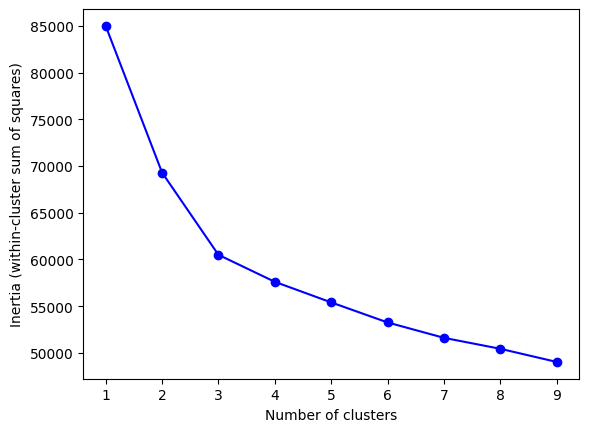

In [268]:
# IDENTIFICO MIGLIORE NUMERO DI CLASSI -> con valori standard

Ks = range(1, 10)
# KMeans(i) RUN THE ALGORITM WITH i CLUSTERS
# FALLO SUL DATA SET X
# POI CALCOLA  L'INERTIA
inertia = [KMeans(n_clusters=i, n_init=10).fit(X_DATA).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


In [269]:
# Controllo anche con silhoutte
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, n_init = 10,random_state=0)
    # COSì OTTENGO I LABEL
    cluster_labels=clusterer.fit_predict(X_DATA)
    # compio la silhouette everage score
    silhouette_avg=silhouette_score(X_DATA,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)



For n_clusters= 2 The average silhouette_score is : 0.16988770620375393
For n_clusters= 3 The average silhouette_score is : 0.1614922731302753
For n_clusters= 4 The average silhouette_score is : 0.14767607272264135
For n_clusters= 5 The average silhouette_score is : 0.13171270128137036
For n_clusters= 6 The average silhouette_score is : 0.12546885360874238
For n_clusters= 7 The average silhouette_score is : 0.1226284525250132
For n_clusters= 8 The average silhouette_score is : 0.1262132652252939
For n_clusters= 9 The average silhouette_score is : 0.12215707686939102
For n_clusters= 10 The average silhouette_score is : 0.12664678615484765


In [273]:
# clustering
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X_DATA)

# print(X_DATA)

# print inertia & cluster center
# print("inertia for k=3 is", kmeans.inertia_)
# print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
centers = kmeans.cluster_centers_
print("cluster labels: ", y, centers)

CENTRES_VALORI = np.dot(centers, PC)
print(CENTRES_VALORI.shape)
print(PC.shape)

cluster labels:  [1 1 1 ... 1 1 1] [[ 0.91582086  0.10511797  1.38643753  0.07347836 -0.35379847 -0.30797222
  -0.94615257 -0.93561589 -1.33837354 -0.93306501  0.17810136 -1.03271806
   0.09219284 -0.93834115 -0.96341632 -1.18807605 -0.44730339]
 [-0.55547402 -0.0345423  -0.24426672 -0.25460468  0.91472467 -0.39921487
   0.91079469  0.84161548  0.56297672  1.04037666  0.63602817  1.09619479
   0.69207686  1.02832832  1.12557654  0.40145225  0.22469664]
 [-0.04426076 -0.01836265 -0.33826813  0.09194094 -0.30121228  0.28130889
  -0.10745309 -0.07941605  0.17779226 -0.17060802 -0.34688522 -0.16368936
  -0.34452576 -0.16342042 -0.19950713  0.20251914  0.04280721]]
(3, 3)
(17, 3)


/Users/michelebersani/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


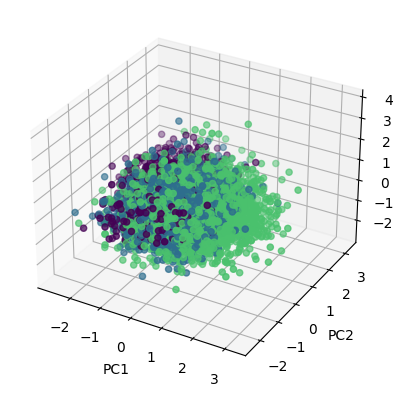

In [294]:
# visualizzazione grafica
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#  X.iloc[:,1] vado a prendere tutte le righe della colonna 1 partendo a 0 per le colonne
# utilizza l'ordine della matrice X e Y per mapapre i coliri ai punti
ax.scatter(NEW_DATA[:,0], NEW_DATA[:,1], NEW_DATA[:,2], c=cmap(norm(y)), marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC2')

plt.show()

Index(['Age', 'Gender', 'Job', 'Area', 'CitySize', 'FamilySize', 'Income',
       'Wealth', 'Debt', 'FinEdu', 'ESG', 'Digital', 'BankFriend', 'LifeStyle',
       'Luxury', 'Saving', 'Investments'],
      dtype='object')
(5000, 17)


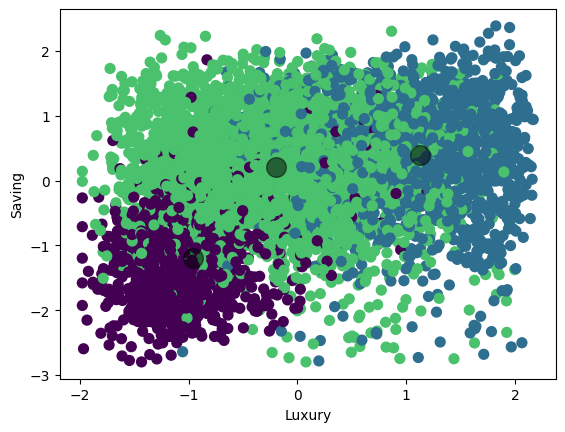

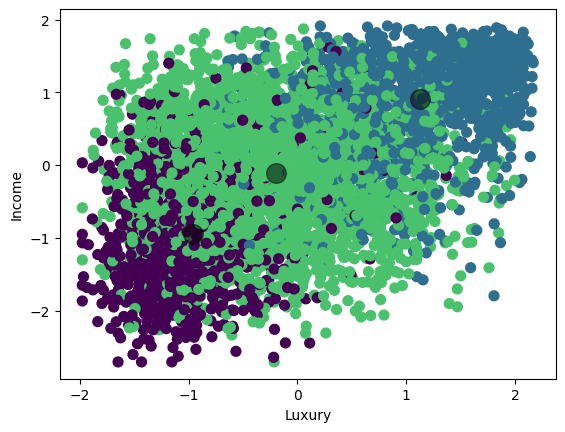

In [279]:
# VI SUALIZZAZIONE A 2 DIMENSIONI
figs = [(14, 15), (14, 6)]
labels = df_new.columns

print(labels)

norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

print(X_DATA.shape)
for i in range(2):
    fig = plt.figure(i)
    plt.scatter(X_DATA.iloc[:,figs[i][0]], X_DATA.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()